# Dao THAUVIN
# Luc Sterkers

# Practical work 3: 2D sampling and aliasing 

Properties studied in 1D apply in 2D. The following results can be admitted: 
 - given a regular grid, a sampling of a continuous 2D signal can be modelled as follow:
$$
x_e(t,u) = x(t,u)e(t,u)\quad \text{with}\quad e(t,u) = \sum_{k=-\infty}^{+\infty} \sum_{l=-\infty}^{+\infty} \delta(t-kT_e,u - lT_e)
$$ $e$ is the analog of Dirac comb (also called impulse train) in 2D
 - spectrum of $x_e$ writes:
$$
X_e(f,g) = \frac1{T_e^2}\sum_{k=-\infty}^{+\infty} \sum_{l=-\infty}^{+\infty} X(f-kf_e,g-lf_e)
$$
2D sampling then implies a periodisation of the spectrum for the two dimensions
 - it is possible to reconstruct the original signal from the sampled signal if 2D Shannon condition is verified (band limited signal) with:
$$
x_r (t,u) = \sum_{k=-\infty}^{+\infty} \sum_{l=\infty}^{+\infty} x_e(kT_e,lT_e) \operatorname{sinc}(\pi f_e (t-kT_e)) \operatorname{sinc}(\pi f_e(u - lT_e))\qquad\qquad\qquad\text{(1)}
$$
so called Shannon interpolation.
 
## Exercice 1: aliasing and windowing of 2D signals
 
Given the following signal:
$$
s_\theta(t,u) = A\cos(2\pi f_0(t\cos\theta + u\sin\theta))
$$
Here an example with $\theta=\frac\pi4$:
<div>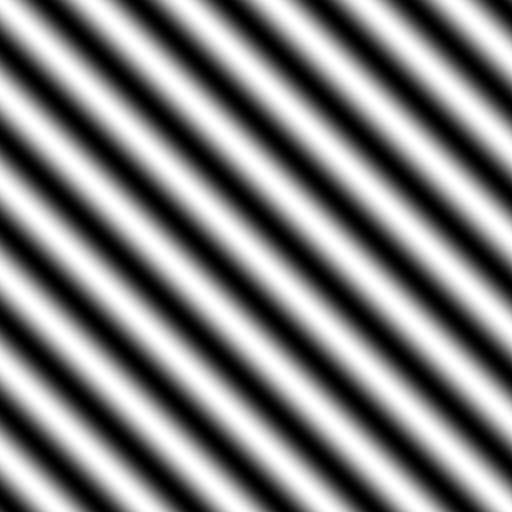</div>
The goal of this exercice is to study the limit conditions of sampling of this image in order to avoid aliasing.

In [1]:
import numpy as np
from numpy.fft import fft2, fftshift
import matplotlib.pyplot as plt
# for interactive ploting, see surf() below
%matplotlib notebook 
from matplotlib import cm
from matplotlib.colors import Normalize
from mpl_toolkits.mplot3d import Axes3D

def sinusoid2d(A, theta, size, T0, Te):
    """ double**2*int*double**2 -> Array[double] """
    ct = np.cos(theta/180*np.pi)
    st = np.sin(theta/180*np.pi)
    x, y = np.meshgrid(np.arange(0, size, Te), np.arange(0, size, Te))
    return A*np.cos(2*np.pi*(y*ct - x*st)/T0)

def shannonInterpolation(I, Te, size):
    """ Array*int*double -> Array[double] """
    n, m = I.shape
    x, y = np.meshgrid(np.arange(0, size), np.arange(0, n))
    Y = np.sinc(x/Te-y)
    x, y = np.meshgrid(np.arange(0, size), np.arange(0, m))
    X = np.sinc(x/Te-y)
    return np.matmul(X.T, np.matmul(I, Y))

def imshow(I,title=None):
    """ display an image """
    plt.figure(figsize=(500//80,500//80))
    plt.gray()
    plt.imshow(I)
    if title: plt.title(title)
    plt.show()

def surf(Z,title=None):
    """ 3D plot of an image """
    X,Y = np.meshgrid(range(Z.shape[1]), range(Z.shape[0]))
    fig = plt.figure(figsize=(600/80,600/80))
    if title: plt.title(title)
    ax = fig.gca(projection='3d')
    ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    plt.show()
    

    

1. We provide the function `sinusoid2d(A, theta, L, T0, Te)` that allows to sample signal $s_\theta$ with a sampling period of `Te` (the grid is regular with the sample sampling value for directions $u$ and $t$). Paremeters `A`, `theta`, `L` and `T0` respectively control the amplitude, orientation and period ($T_0=\frac1{f_0}$) of signal $s_\theta$. Generate a pseudo continuous signal $s_{45}$ with `A=1`, `theta = 45`, `L = 512`, `T0 = 64` and `T_e=1`.


<IPython.core.display.Javascript object>


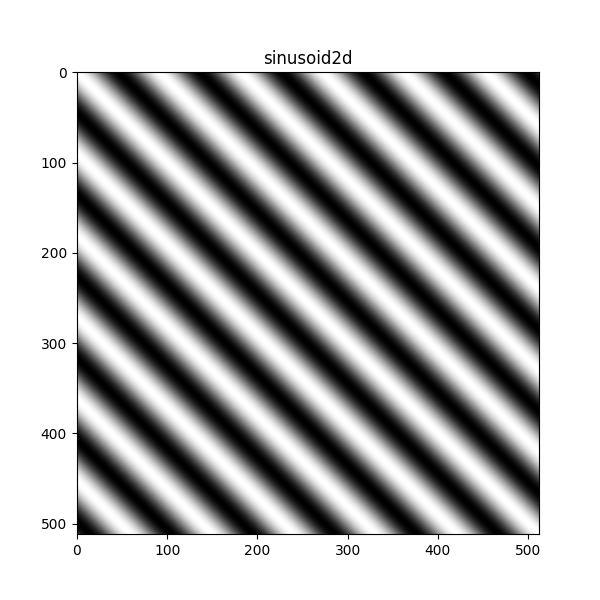

In [2]:
A=1
theta=45
L=512
T0=64
T_e=1
s45 = sinusoid2d(A, theta, L, T0, T_e)
imshow(s45,"sinusoid2d")

2. What is the maximal frequency of previous signal $s_{45}$ in direction $t$ (denoted $f_t^{\text{max}}$) and direction $u$ (denoted $f_u^{\text{max}}$)? Let $f_m = \max(f_t^{\text{max}},f_u^{\text{max}})$. Explain why $f_m$ is the limit frequency (in sens of Shannon) for the sampling of $s_{45}$.


Nous avons ici un signal de la forme :  
$s_{45}(t,u)=A\cos(2\pi f_o(t\cos(\theta)+u\sin(\theta)))$  
avec  
$f_o=1/T0$  
$\theta=(theta/180)*\pi$ (passage en radian)  
$A=A$  
D'après l'exercice 5 (c) du TD2:  
$TF[s_{45}]=A/2(\delta(f-f_o\cos(\theta))\delta(f-f_o\sin(\theta))+\delta(f+f_o\cos(\theta))\delta(f+f_o\sin(\theta)))$  
$f_t^{max}$ = maximum des frequences maximales de $\delta(f-f_o\cos(\theta))$ et $\delta(f+f_o\cos(\theta))$  
$f_t^{max} = max(-f_o\cos(\theta),f_o\cos(\theta))$  
$f_t^{max} = f_o\cos(\theta)$  
$f_t^{max} = 0.011048543456039804$  

$f_u^{max}$ = maximum des frequences maximales de $\delta(f-f_o\sin(\theta))$ et $\delta(f+f_o\sin(\theta))$  
$f_u^{max} = max(-f_o\sin(\theta),f_o\sin(\theta))$  
$f_u^{max} = f_o\sin(\theta)$  
$f_u^{max} = 0.011048543456039804$  
Donc  
$f^{max} = 0.011048543456039804$  
Lors de la reconstruction de l'image il faut récuperer la frequence original du signal avec une multiplication avec une fonction carré, or la frequence du signal est entre $-f_m$ et $f_m$.  
Si on echantillone l'image avec une periode $T_e$, cela revient à répeter le spectre tous les $1/T_e$ (periode de la répétition), si on veut que les répétitions ne soient pas en collision (pour pouvoir récupérer un signal intact), il faut donc repeter le signal avec une periode de $2f_m$ au minimum donc:  
$1/T_e \geq 2f_m$  
$f_e \geq 2f_m$

In [3]:
print("ftmax:",-(1/T0)*np.cos((theta/180)*np.pi),"ou",(1/T0)*np.cos((theta/180)*np.pi))
ftmax = (1/T0)*np.cos((theta/180)*np.pi)
print("ftmax:",ftmax)

print("fumax:",-(1/T0)*np.sin((theta/180)*np.pi),"ou",(1/T0)*np.sin((theta/180)*np.pi))
fumax = (1/T0)*np.sin((theta/180)*np.pi)
print("fumax:",fumax)

def fmax(theta,T0):
    
    return max(max(-(1/T0)*np.cos((theta/180)*np.pi),(1/T0)*np.cos((theta/180)*np.pi)),max(-(1/T0)*np.sin((theta/180)*np.pi),(1/T0)*np.sin((theta/180)*np.pi)))

fm=max(fumax,ftmax)
fm=fmax(theta,T0)

print("fm:",fm)

ftmax: -0.011048543456039806 ou 0.011048543456039806
ftmax: 0.011048543456039806
fumax: -0.011048543456039804 ou 0.011048543456039804
fumax: 0.011048543456039804
fm: 0.011048543456039806


2. (a)  Sample $s_{45}$ with $f_e = 16 f_m$ and display the sampled signal.

<IPython.core.display.Javascript object>


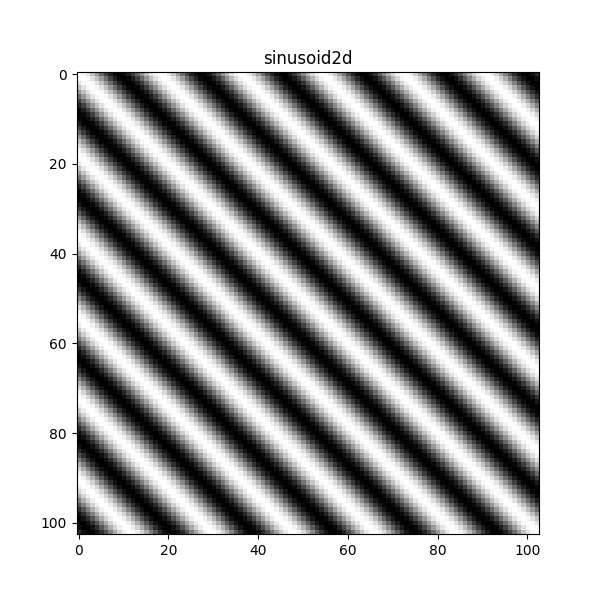

In [4]:
fe1=16*fm
temps1=int(1/fe1)
sampling1 = s45[::temps1,::temps1]
imshow(sampling1,"sinusoid2d")

2. (b) Compute the Fourier transform of the sampled signal and display frequencies. One can use `surf()` function for an interactive 3D plot.

<IPython.core.display.Javascript object>


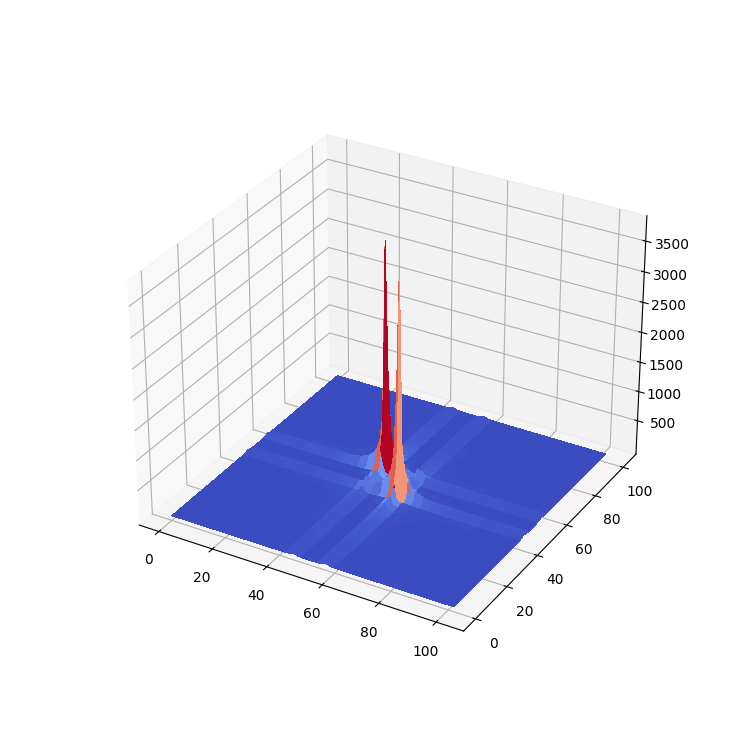

In [5]:
surf(np.abs(fftshift(fft2(sampling1))))

2. (c) Comment the spectrum:
    - verify the presence of the two Dirac peaks
    - for various values of $T_e$, observe changes in the spectrum. Compare with the spectrum of the continuous signal ($s_{45}$). What is the origin of theses differences?
    - (Bonus question):
        - Why, aside the two Dirac peaks, there are somes structures? Explain the origin of these lobes.
        - Increase $T_0$ in order to obtain a unique peak. Explain the origin of this fusion. Verify the limit value of $T_0$ for which the two peaks interfer.

On observe bien 2 pics.
Lorsque $T_e$ est trop faible, alors le spectre diffère à cause de l'aliasing, on obtient meme un seul pic au bout d'un moment (fusion de 2 pics en superposition).  
On observe aussi des lobes du à la limite du domaine fini du signal digitalisé, c'est comme si on multipliait le signal par une fonction carré, ce qui est equivalent à faire une convolution avec un cosinus cardinal avec son spectre de fréquence.    

Te= 90 fe= 1.0056629776875343 de fm


<IPython.core.display.Javascript object>


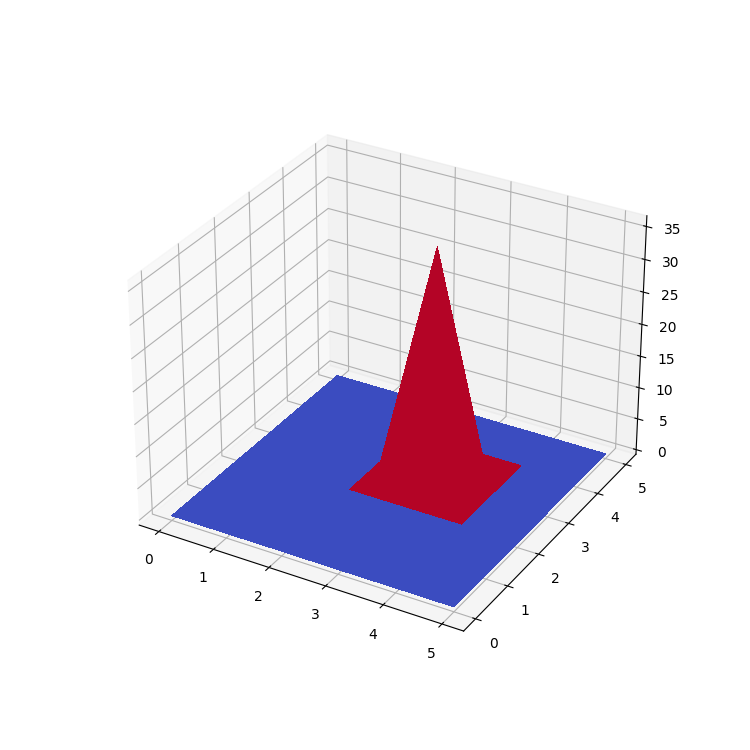

Te= 60 fe= 1.5084944665313014 de fm


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


<IPython.core.display.Javascript object>


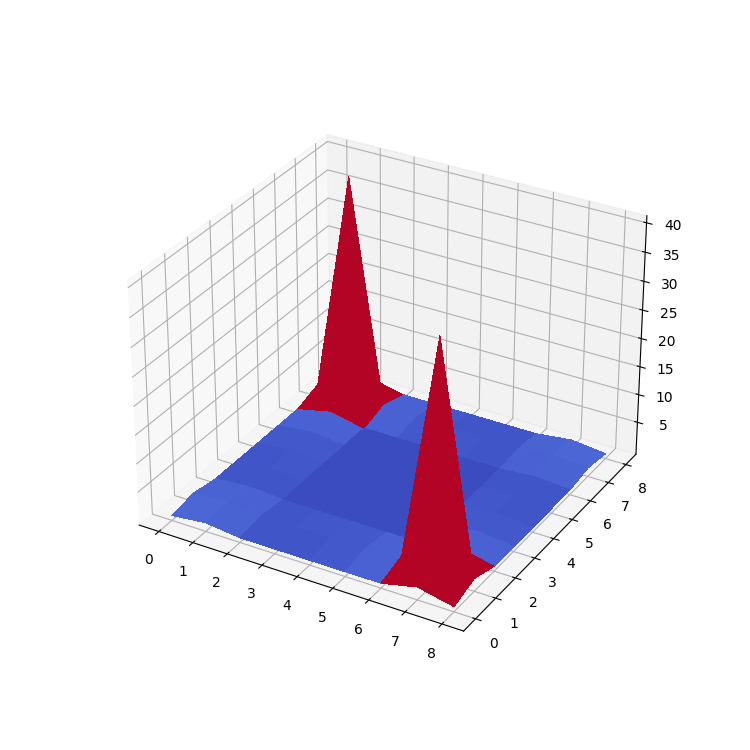

Te= 45 fe= 2.0113259553750686 de fm


<IPython.core.display.Javascript object>


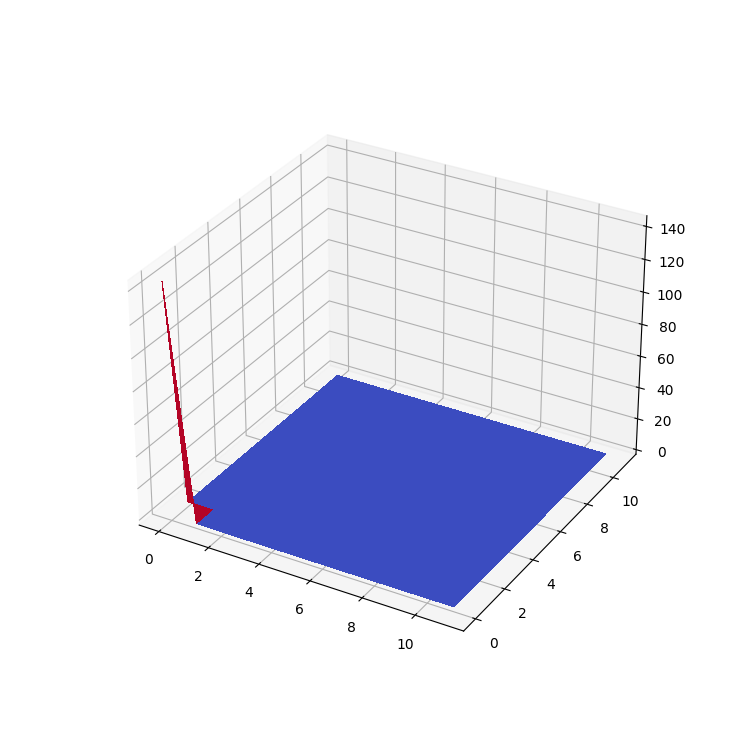

Te= 36 fe= 2.5141574442188355 de fm


<IPython.core.display.Javascript object>


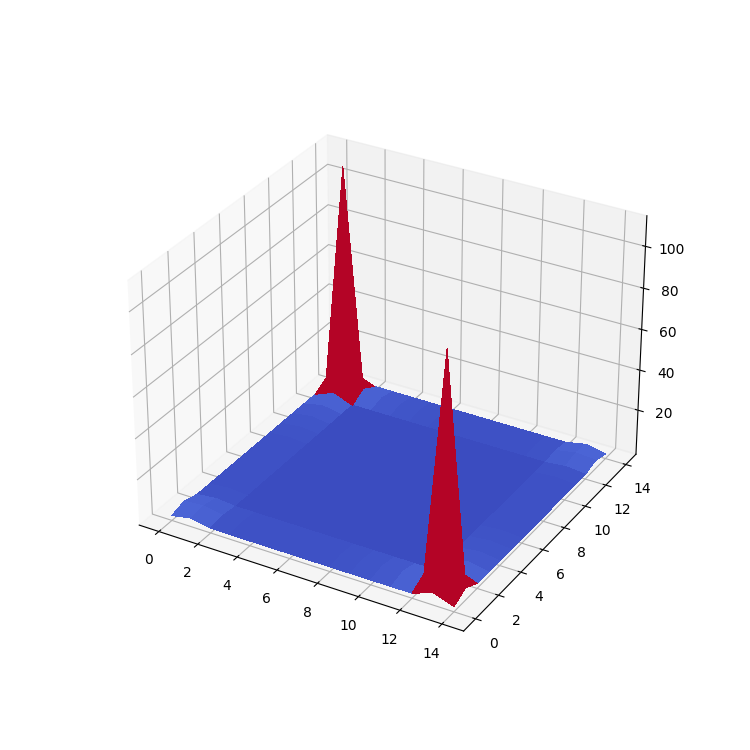

Te= 30 fe= 3.0169889330626027 de fm


<IPython.core.display.Javascript object>


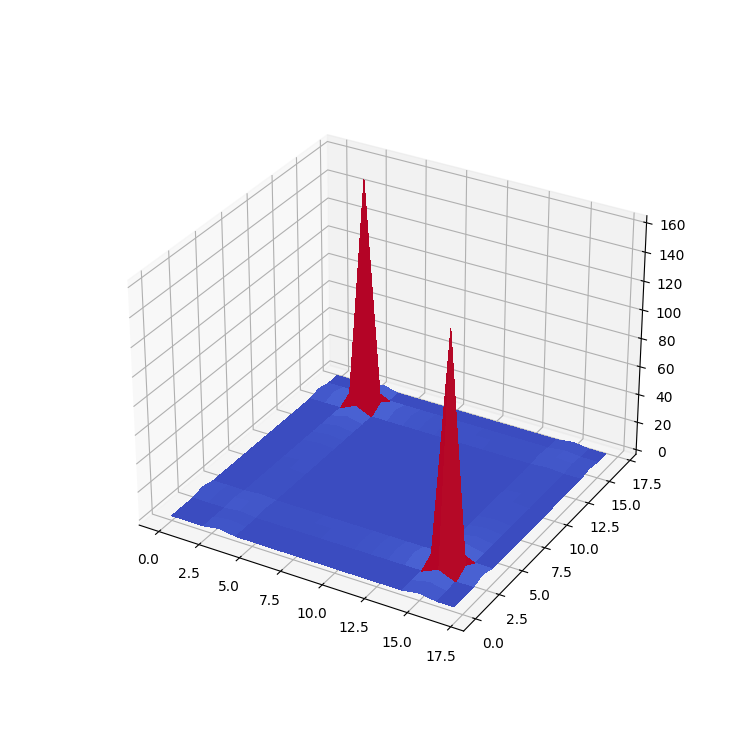

Te= 25 fe= 3.620386719675123 de fm


<IPython.core.display.Javascript object>


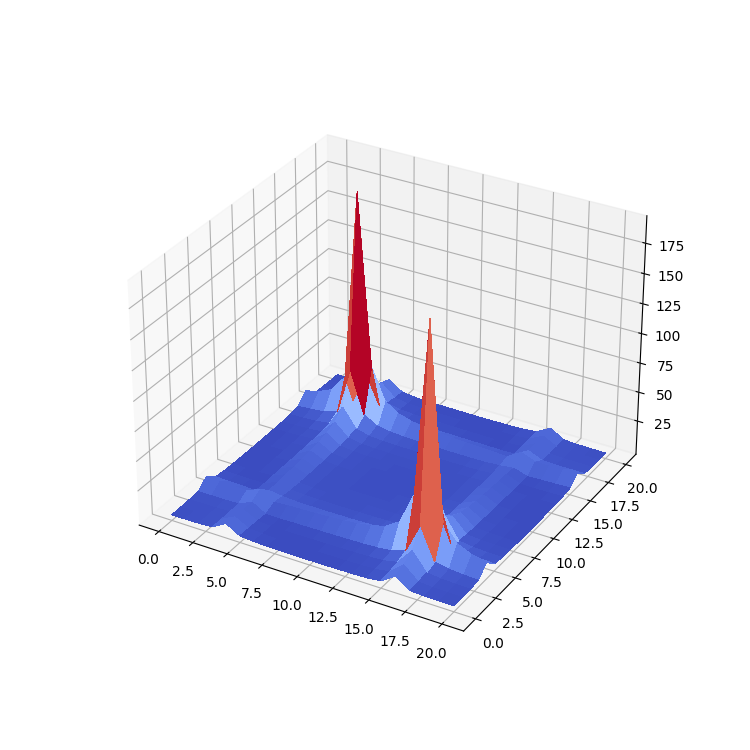

Te= 22 fe= 4.1140758178126395 de fm


<IPython.core.display.Javascript object>


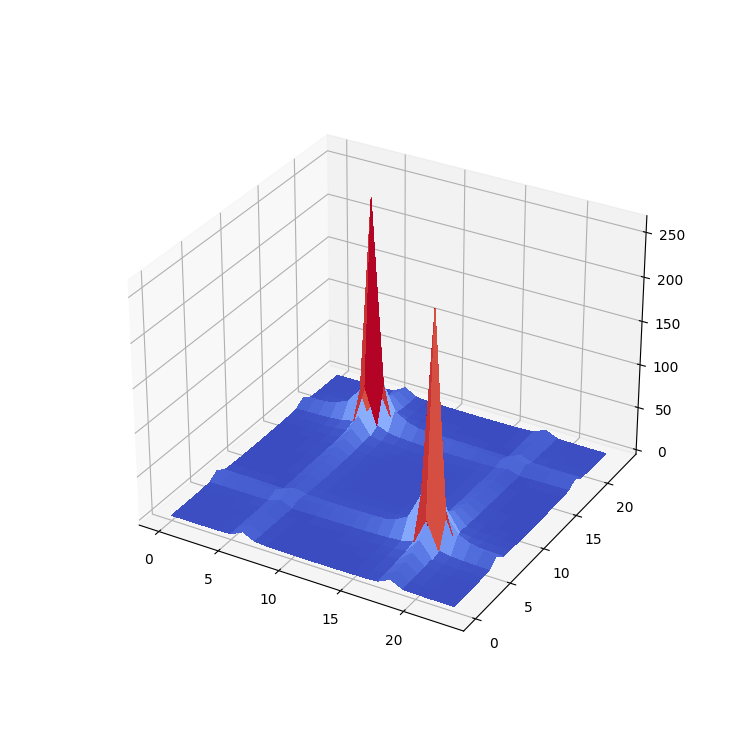

Te= 20 fe= 4.525483399593904 de fm


<IPython.core.display.Javascript object>


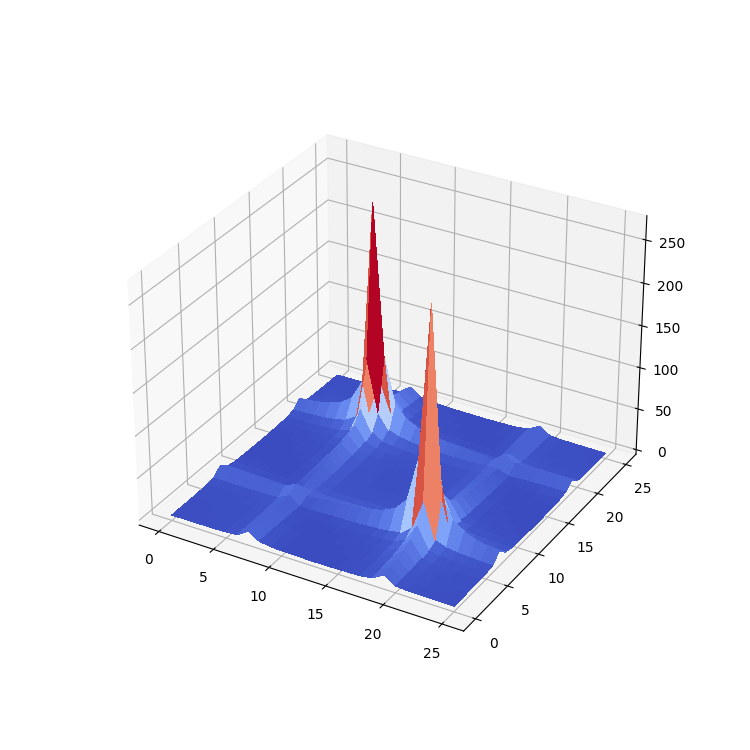

Te= 18 fe= 5.028314888437671 de fm


<IPython.core.display.Javascript object>


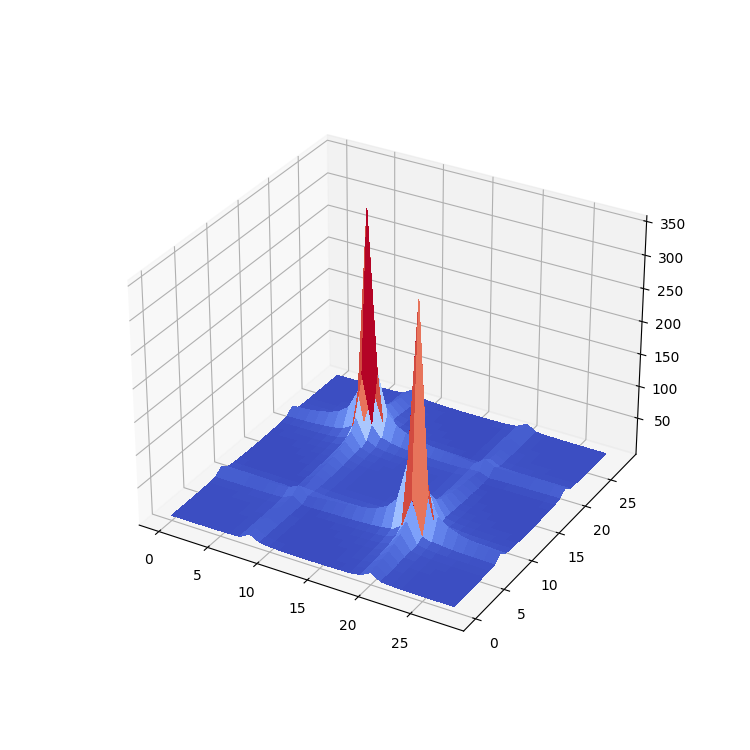

Te= 16 fe= 5.65685424949238 de fm


<IPython.core.display.Javascript object>


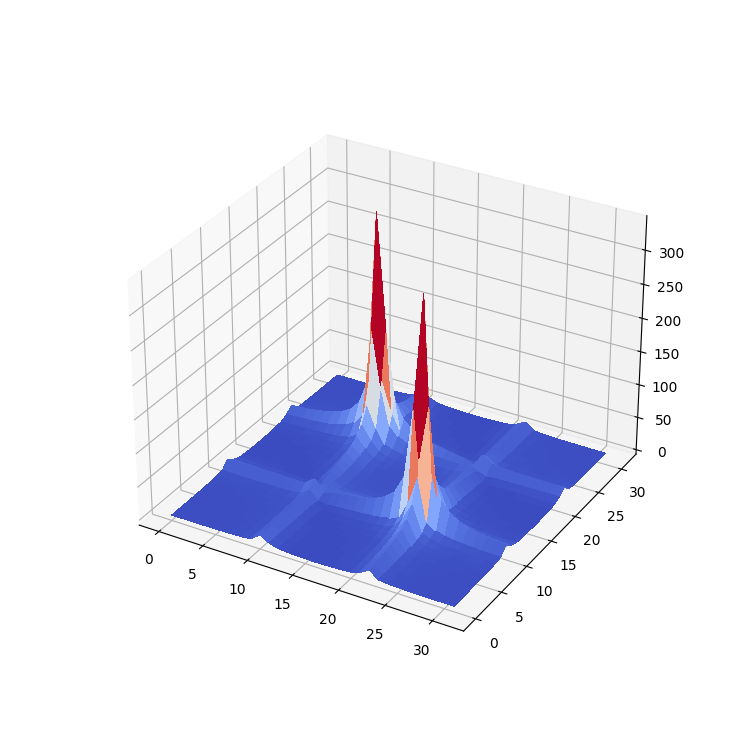

In [6]:
for mu in np.arange(1,6,0.5):
    Te_test=int(1/(mu*fm))
    sampling_test = s45[::Te_test,::Te_test]
    print("Te=",str(Te_test),"fe=",(1/Te_test)/fm,"de fm")
    surf(np.abs(fftshift(fft2(sampling_test))),"Te="+str(Te_test))


avec T_0 = 724


<IPython.core.display.Javascript object>


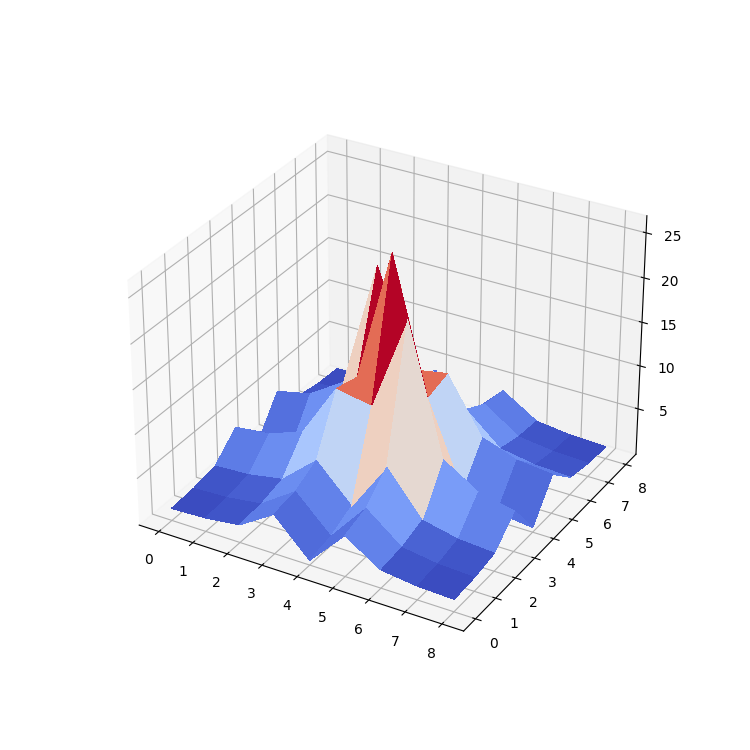

avec T_0 = 725
Periode d'echantillonage: 64
ftmax: 0.0009753196981883414
fumax: 0.0009753196981883412


<IPython.core.display.Javascript object>


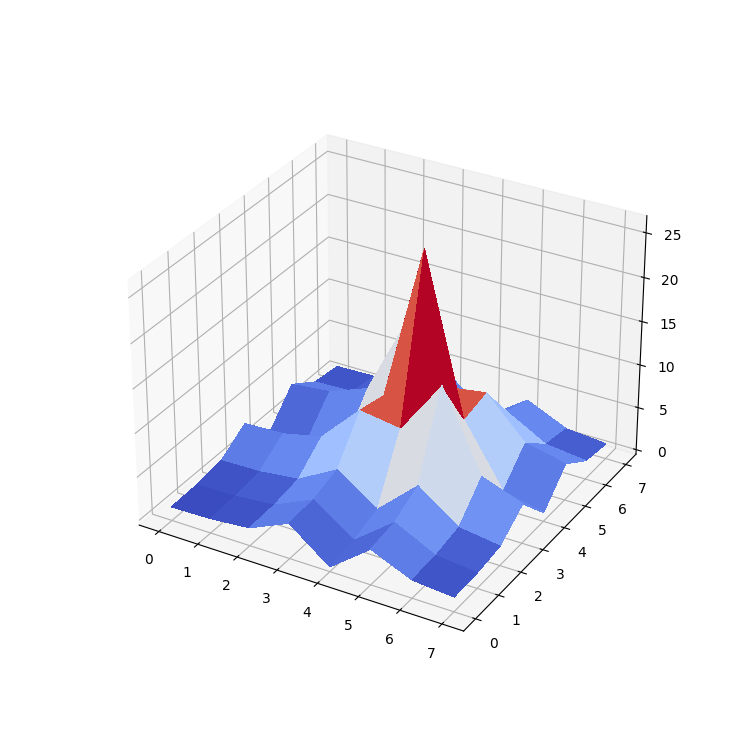

In [7]:
A_test=1
theta_test=45
L_test=512
T0_test=724
T_e_test=1

s45_test = sinusoid2d(A_test, theta_test, L_test, T0_test, T_e_test)

fe_test=16*fmax(theta_test,T0_test)
temps_test=int(1/fe_test)
sampling_test = s45_test[::temps_test,::temps_test]

print("avec T_0 = 724")
surf(np.abs(fftshift(fft2(sampling_test))))

A_test=1
theta_test=45
L_test=512
T0_test=725
T_e_test=1

s45_test = sinusoid2d(A_test, theta_test, L_test, T0_test, T_e_test)

fe_test=16*fmax(theta_test,T0_test)

temps_test=int(1/fe_test)

sampling_test = s45_test[::temps_test,::temps_test]

print("avec T_0 = 725")
print("Periode d'echantillonage:",temps_test)
ftmax = (1/T0_test)*np.cos((theta_test/180)*np.pi)
print("ftmax:",ftmax)
fumax = (1/T0_test)*np.sin((theta_test/180)*np.pi)
print("fumax:",fumax)

surf(np.abs(fftshift(fft2(sampling_test))))

On observe une fusion des deux pics à $T_0=725$, on obtient un seul pic car l'augmentation de $T_0$ augmente la periode d'echantillonage au niveau du signal mais aussi au niveau de la frequence, on reduit donc le nombre de points prient dans l'image/le spectre (étant dans un domaine fini) jusqu'a ce que le nombre de points soient insuffisant pour pouvoir reconstruire le signal en deux pics de dirac.

3. (a) Sample $s_{45}$ with $f_0=4 f_m$ and display the sampled signal.

<IPython.core.display.Javascript object>


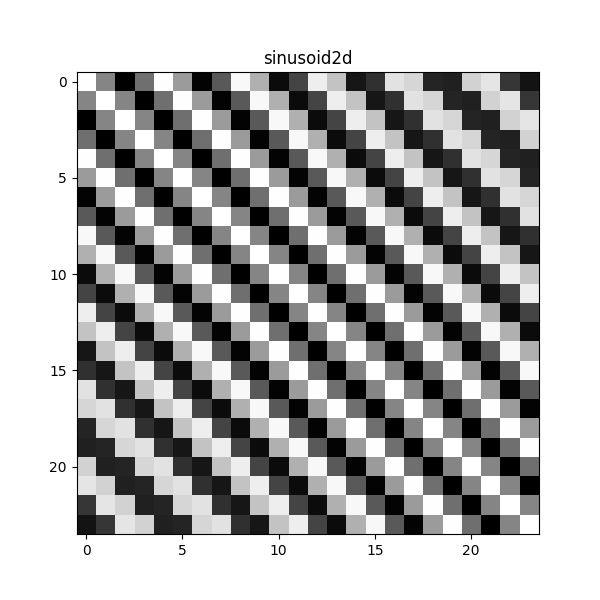

In [8]:
fe2=4*fm
temps2=int(1/fe2)
sampling2 = s45[::temps2,::temps2]
imshow(sampling2,"sinusoid2d")

3. (b) Write a function `error()` implementing the relative average error $\displaystyle\epsilon_r = \frac 1{2AL^2}\sum_{k=0}^L\sum_{l=0}^L |x_r(k,l)-x_d(k,l)|$.

In [9]:
def error(I,I2,A,L):
    return (1/(2*A*(L**2)))*np.sum(np.abs(I-I2))
    


3. (c) Reconstruct the sampled signal. Display original and reconstructed signal.
   Print the relative average error between the original and reconstructed images. What is the origin of this error?

pour le premier echantillonage, erreur moyenne 0.005086796124886525


<IPython.core.display.Javascript object>


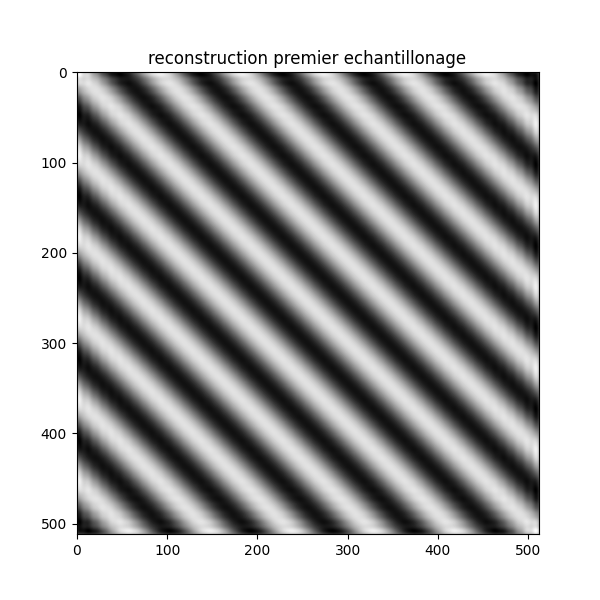

pour le second echantillonage, erreur moyenne 0.019963240666745385


<IPython.core.display.Javascript object>


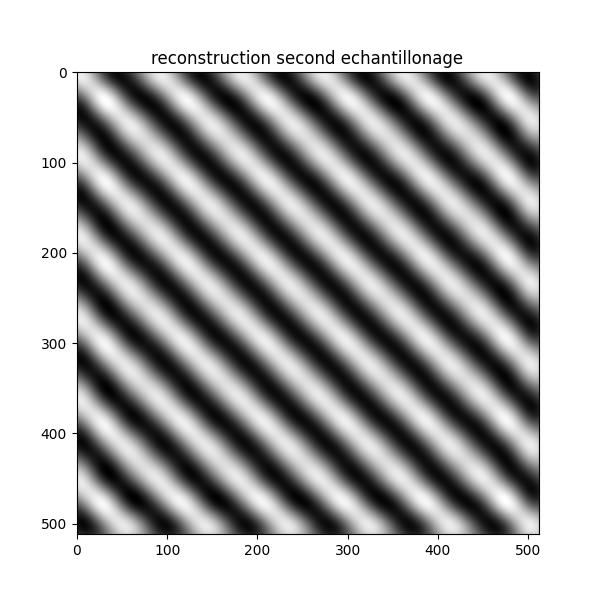

In [10]:
img1 = shannonInterpolation(sampling1,int(1/fe1),s45.shape[0])
print("pour le premier echantillonage, erreur moyenne",error(s45,img1,A,L))
imshow(img1,"reconstruction premier echantillonage")

img2 = shannonInterpolation(sampling2,int(1/fe2),s45.shape[0])
print("pour le second echantillonage, erreur moyenne",error(s45,img2,A,L))
imshow(img2,"reconstruction second echantillonage")

les taux d'erreurs sont dus à l'impossibilité d'avoir une mesure exacte lors de la reconstruction.  
On observe une plus haute erreur moyenne pour l'image 2 car on prends moins de points, ce qui entraine plus d'erreurs de precision.

4. Same question than 3. with $f_e = \frac32f_m$. Comment the effects of aliasing.

<IPython.core.display.Javascript object>


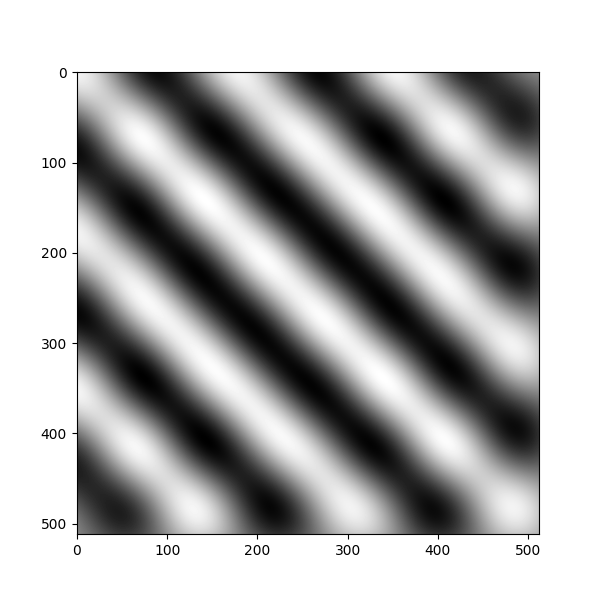

0.40451498628248594


In [11]:
fe3=(3/2)*fm
temps3=int(1/fe3)

sampling3 = s45[::temps3,::temps3]
img3 = shannonInterpolation(sampling3,int(1/fe3),s45.shape[0])
imshow(img3)



print(error(s45,img3,A,L))

On a un taux d'erreur beaucoup plus important et une image beaucoup moins nette du à l'aliasing (à cause du chevauchement des spectres lors de l'échantillonage qui change donc les frequences lors de la reconstruction).

5. Consider the continuous signal with an oriention of $\theta=10°$. What is the value of $f_m$? With a sampling of $\frac32 f_e$ what is the additional drawback appearing after the reconstruction? Explain.

<IPython.core.display.Javascript object>


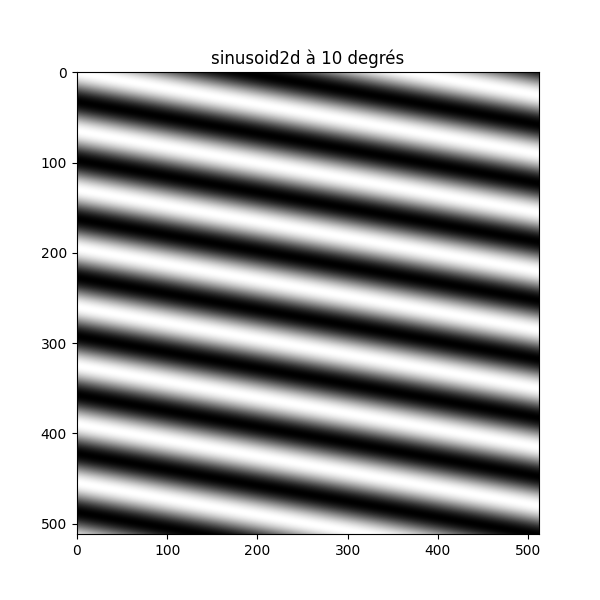

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


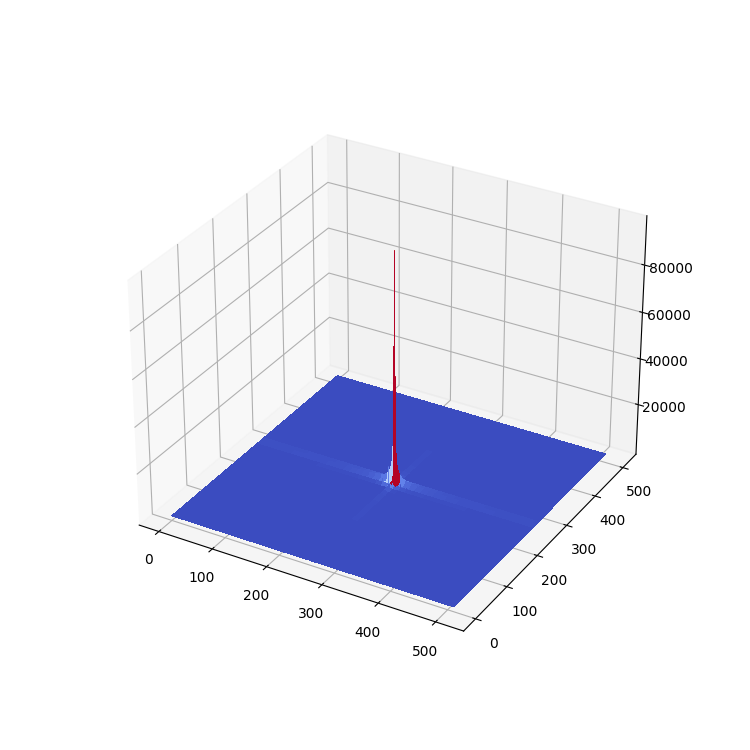

cos et sin 0.01538762114081575 0.0027132527760457864
fm: 0.01538762114081575


<IPython.core.display.Javascript object>


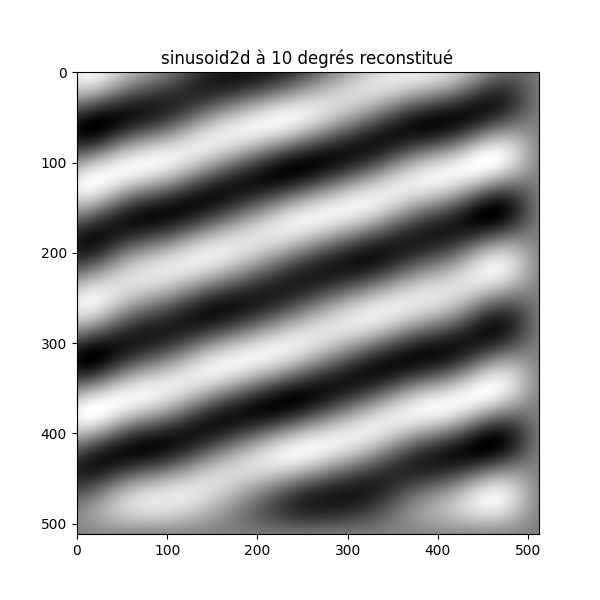

<IPython.core.display.Javascript object>


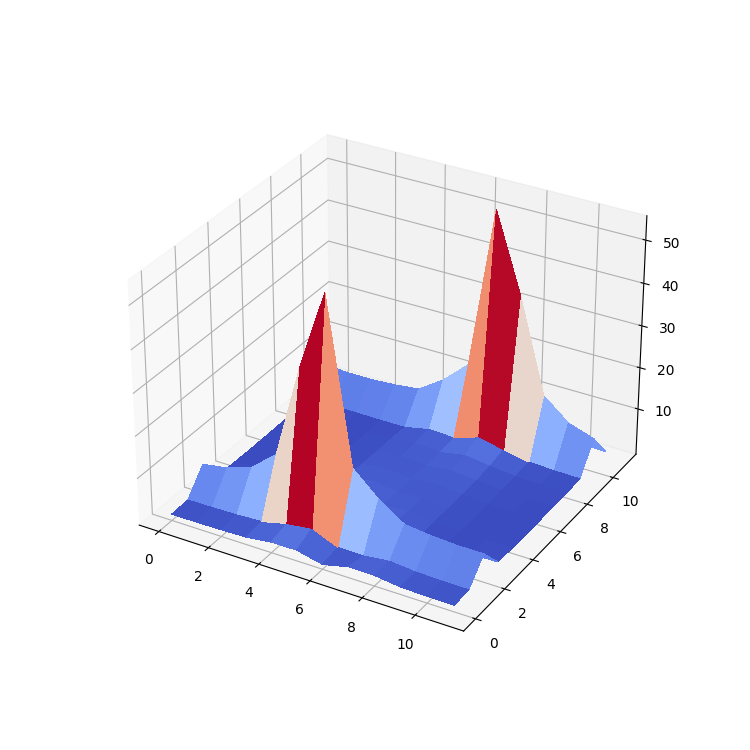

taux d'erreur: 0.3973382004208809


In [12]:
A_2=1
theta_2=10
L_2=512
T0_2=64
T_e_2=1
s45_2 = sinusoid2d(A_2, theta_2, L_2, T0_2, T_e_2)
imshow(s45_2,"sinusoid2d à 10 degrés")
surf(np.abs(fftshift(fft2(s45_2))))
fm_2=fmax(theta_2,T0_2)

print("cos et sin",(1/T0_2)*np.cos((theta_2/180)*np.pi),(1/T0_2)*np.sin((theta_2/180)*np.pi))
print("fm:",fm_2)

fe_2=(3/2)*fm_2
temps_2=int(1/fe_2)

sampling_2 = s45_2[::temps_2,::temps_2]
img_2 = shannonInterpolation(sampling_2,int(1/fe_2),s45_2.shape[0])
imshow(img_2,"sinusoid2d à 10 degrés reconstitué")

surf(np.abs(fftshift(fft2(sampling_2))))

print("taux d'erreur:",error(s45_2,img_2,A,L))

Avec la methode que la dernière fois, on obtient:  
$f_m = 0.01538762114081575$  
L'image reconstruit n'a plus la même orientation, cela est du à l'alliasing, la superposition des spectres entrainent la récupération des mauvais pics de dirac, l'image n'avait que un seul pic de dirac qui a été recupérer une fois de plus lors de l'interpolation de Shannon.

6. Bonus question: write a function `shannonInterpolationLoop()` implementing equation (1) using two loops, in a C way. Compare and discuss the run time of this function and  `shannonInterpolation()` on a small signal ($L=64$). Runtime can be measured using `tic()` and `tac()` functions.

In [13]:
from time import process_time
mytime = 0
def tic():
    """ NoneType -> NoneType """
    global mytime
    mytime = process_time()
def tac():
    """ NoneType -> int """
    global mytime
    print (process_time()-mytime)
    mytime = process_time()

### your code starts below
def shannonInterpolationLoop(I, Te, size):
    """ Array*int*double -> Array[double] """
     
    n, m = I.shape
    Y = np.zeros((n,size))
    for x in np.arange(0, size):
        for y in np.arange(0, n):
            Y[y][x] = np.sinc(x/Te-y)
    X = np.zeros((m,size))

    for x in np.arange(0, size):
        for y in np.arange(0, m):
            X[y][x] = np.sinc(x/Te-y)
    #print(X)
    res = np.zeros((n,size))
    for i in range(0,n):
        for j in range(0,size):
            for x in range(len(I[i])):
                res[i,j]=res[i,j]+I[i,x]*Y[x,j]
    res_2 = np.zeros((size,size))
    X=X.T
    for i in range(0,size):
        for j in range(0,size):
            for x in range(len(X[i])):
                res_2[i,j]=res_2[i,j]+X[i,x]*res[x,j]  
    return res_2

A_b=1
theta_b=45
L_b=64
T0_b=64
T_e_b=1
s45_b = sinusoid2d(A_b, theta_b, L_b, T0_b, T_e_b)

fm_b=max(max(-(1/T0_b)*np.cos((theta_b/180)*np.pi),(1/T0_b)*np.cos((theta_b/180)*np.pi)),max(-(1/T0_b)*np.sin((theta_b/180)*np.pi),(1/T0)*np.sin((theta_b/180)*np.pi)))
fe_b=(3/2)*fm_b
temps_b=int(1/fe_b)

sampling_b = s45_b[::temps_b,::temps_b]
print("temps sans boucles")
tic()
img_b1 = shannonInterpolation(sampling_b,int(1/fe_b),s45_b.shape[0])
tac()
print("----")
print("temps avec boucles")
tic()
img_b2 = shannonInterpolationLoop(sampling_b,int(1/fe_b),s45_b.shape[0])
tac()

temps sans boucles
0.0005901050000001185
----
temps avec boucles
0.02339540100000015


On observe un temps 20 fois plus grand avec des boucles que sans ce qui montre bien l'interré de limiter les boucles.


## Exercice 2: aliasing on natural images

In this exercice, we study aliasing on image `img/barbara.png`. Aliasing occurring with subsample of image, we propose to write a code that implements a subsample (using function `subSample2()` of factor 2 on the image.  

In [14]:
from PIL import Image

barbara = np.array(Image.open('img/barbara.png'))

def subSample2(I):
    """ Array -> Array """
    return I[::2,::2]

1. Explain what is a subsample of factor 2 and the impact when applied on an image. 

Un sous-échantillonage de taille 2 reduit la taille de l'image par deux (512x512 devient 256x256).  
On enlève une ligne sur deux et une colonne sur 2 sur l'image.

2. Write a code that
 - iterates the subsampling process
 - at each iteration, computes the Fourier transform of the subsampled image

   Display subsampled images and their spectrum. Describe and interpret the effects of aliasing. Why aliasing is a drawback ?

<IPython.core.display.Javascript object>


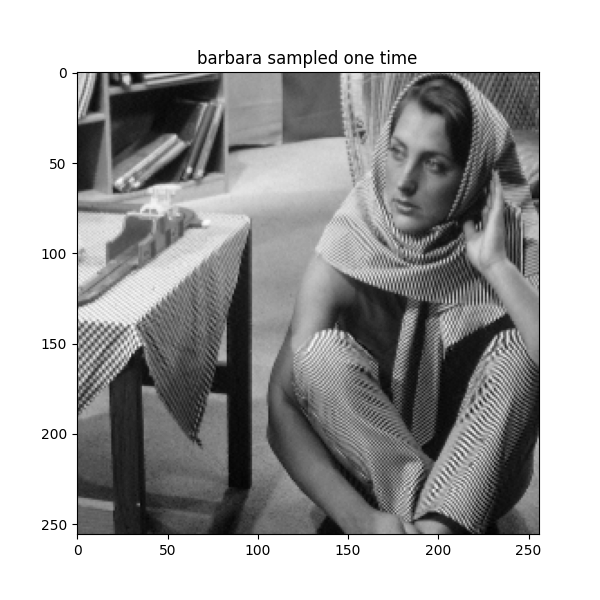

<IPython.core.display.Javascript object>


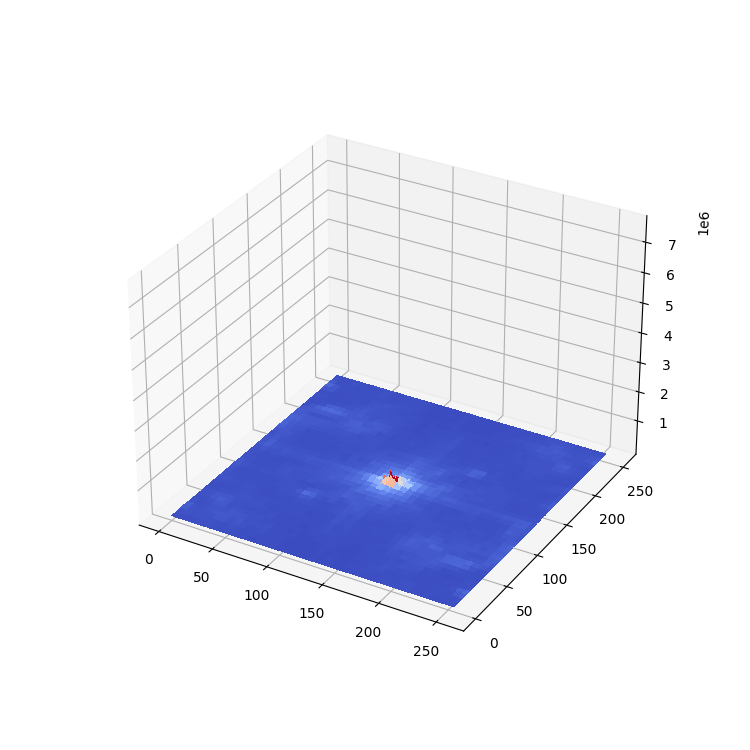

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


<IPython.core.display.Javascript object>


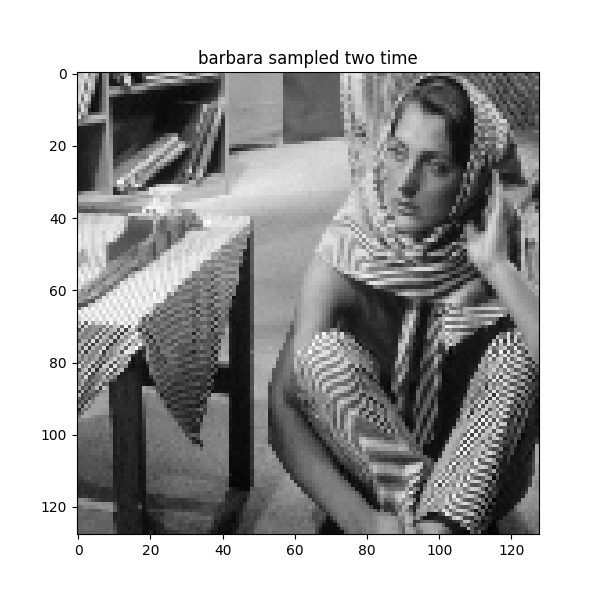

<IPython.core.display.Javascript object>


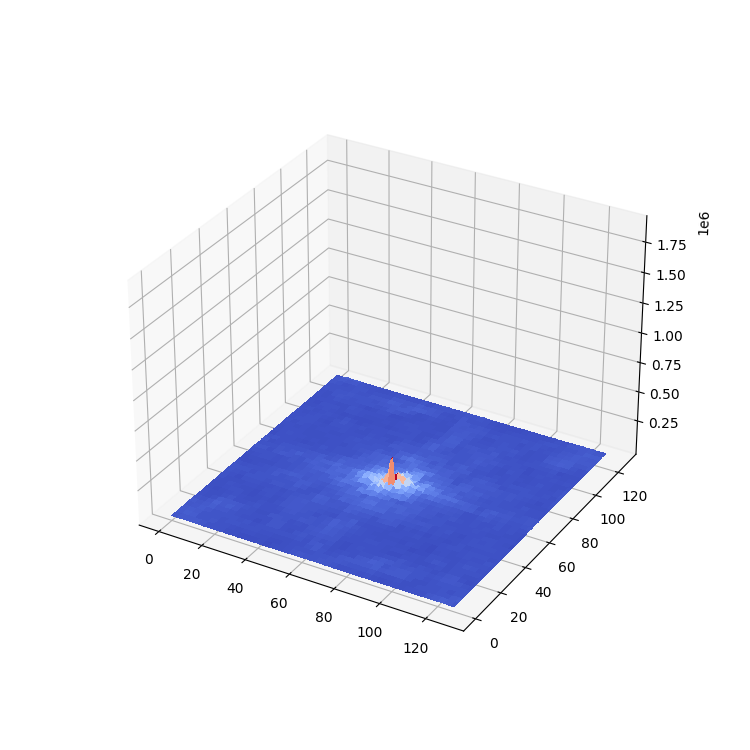

<IPython.core.display.Javascript object>


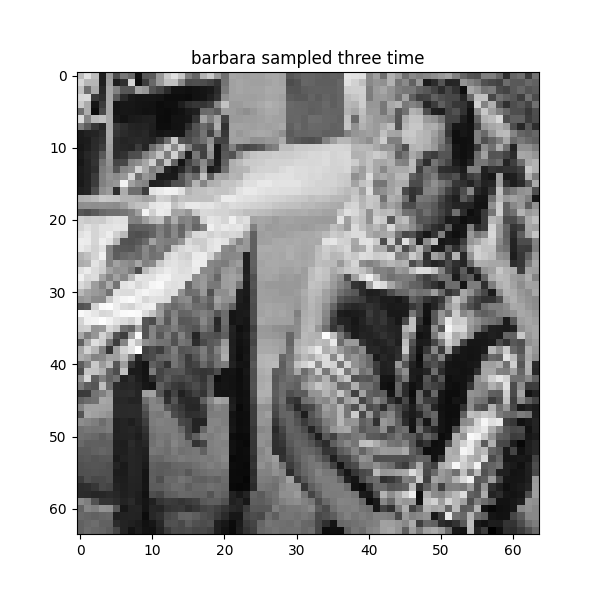

<IPython.core.display.Javascript object>


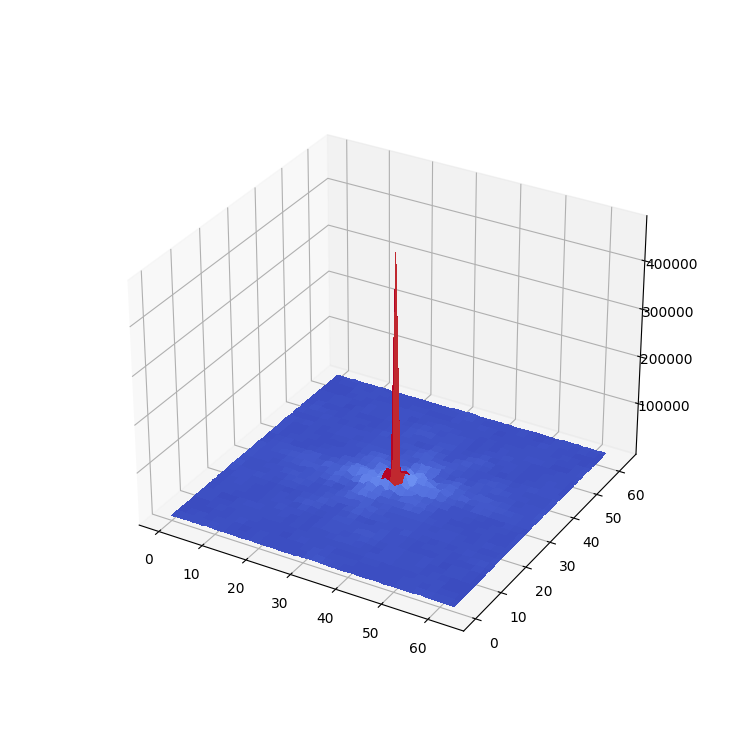

<IPython.core.display.Javascript object>


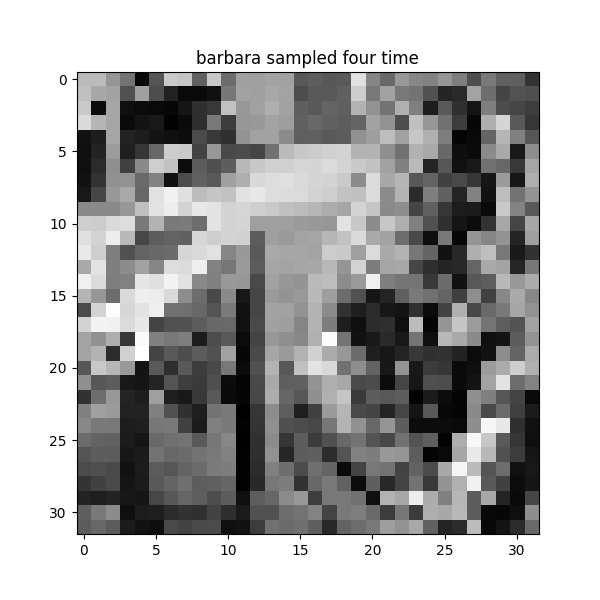

<IPython.core.display.Javascript object>


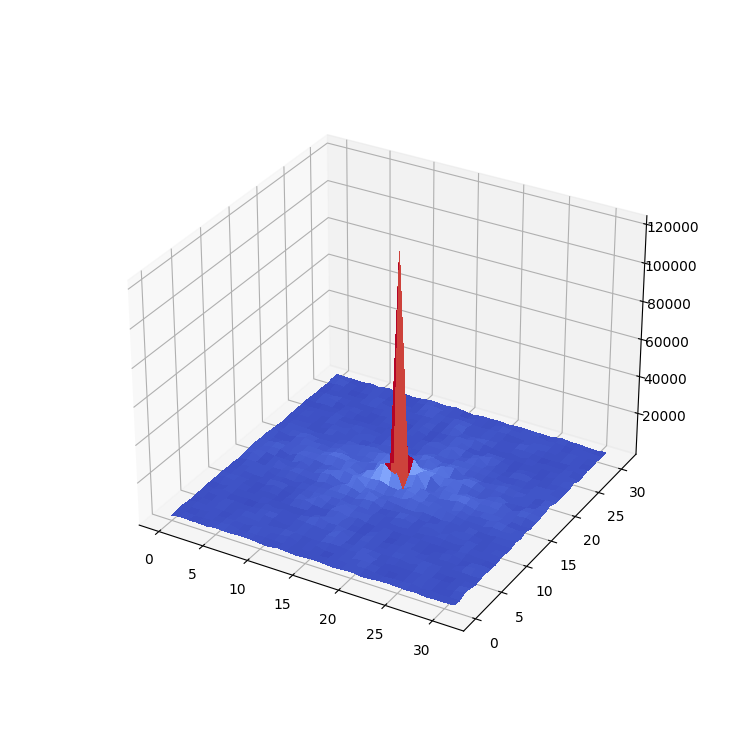

In [15]:

barbara_sampled_1 = subSample2(barbara)
spectrum_1 = np.abs(fftshift(fft2(barbara_sampled_1)))

barbara_sampled_2 = subSample2(barbara_sampled_1)
spectrum_2 = np.abs(fftshift(fft2(barbara_sampled_2)))

barbara_sampled_3 = subSample2(barbara_sampled_2)
spectrum_3 = np.abs(fftshift(fft2(barbara_sampled_3)))

barbara_sampled_4 = subSample2(barbara_sampled_3)
spectrum_4 = np.abs(fftshift(fft2(barbara_sampled_4)))

imshow(barbara_sampled_1,title="barbara sampled one time")
surf(spectrum_1,title="spectrum of barbara sampled one time")

imshow(barbara_sampled_2,title="barbara sampled two time")
surf(spectrum_2,title="spectrum of barbara sampled two time")

imshow(barbara_sampled_3,title="barbara sampled three time")
surf(spectrum_3,title="spectrum of barbara sampled three time")

imshow(barbara_sampled_4,title="barbara sampled four time")
surf(spectrum_4,title="spectrum of barbara sampled four time")

Les images sont de moins en moins nettes, ce qui est forcement un inconvenient.  
L'autre soucis est le changement du spectre, il devient impossible de recuperer les frequences d'origines (et donc l'image continu avec l'interpolation de shannon) car le spectre est completement different, les frequences hautes sont totalement effacées et les frequences basses, elle, deviennent predominantes.

3. Bonus question: same question with the image `img/mandrill.png`.

<IPython.core.display.Javascript object>


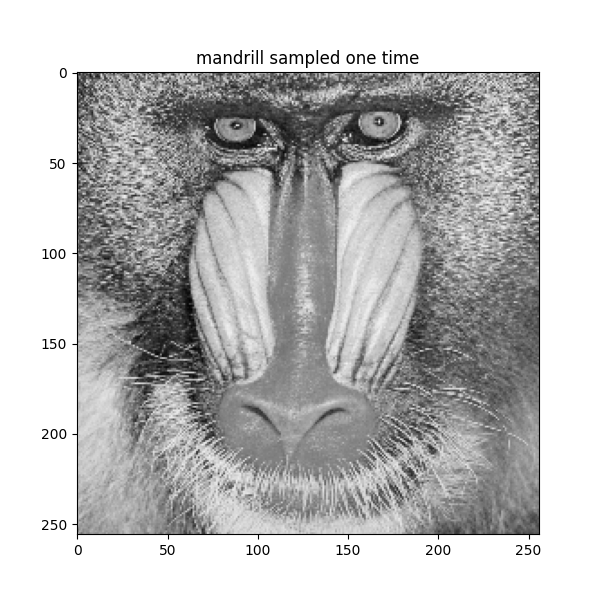

<IPython.core.display.Javascript object>


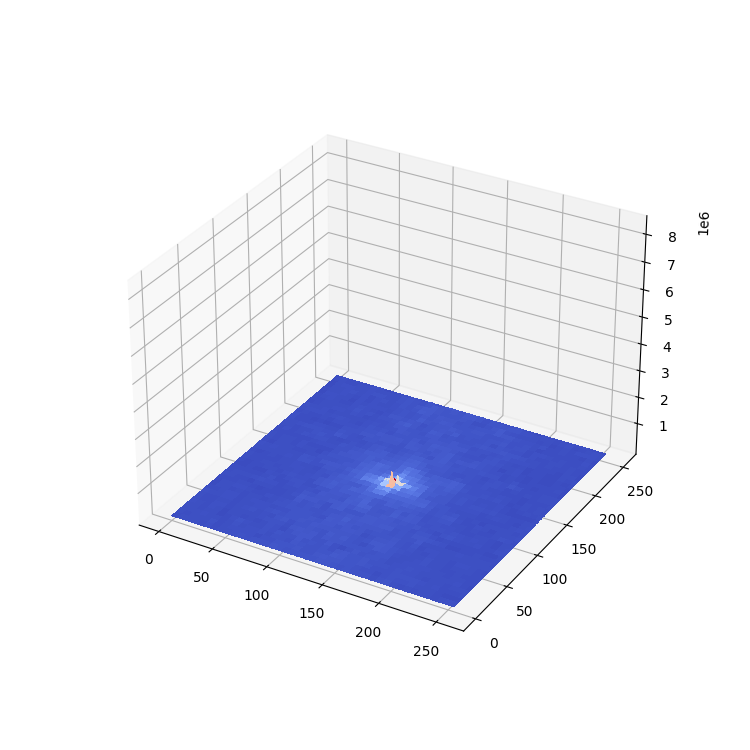

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


<IPython.core.display.Javascript object>


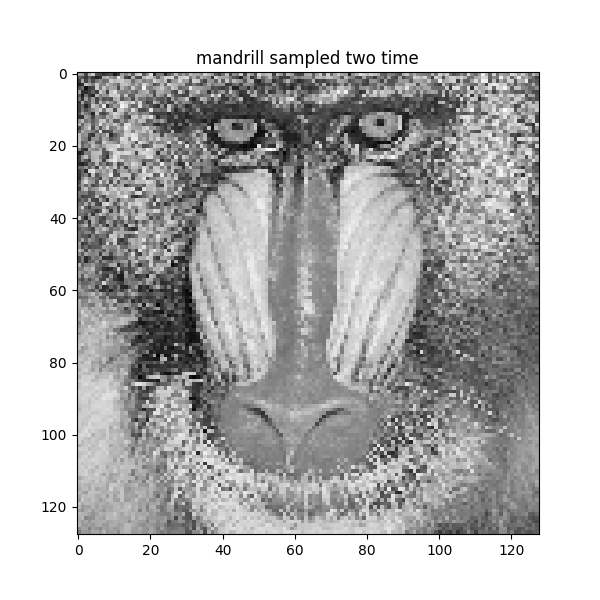

<IPython.core.display.Javascript object>


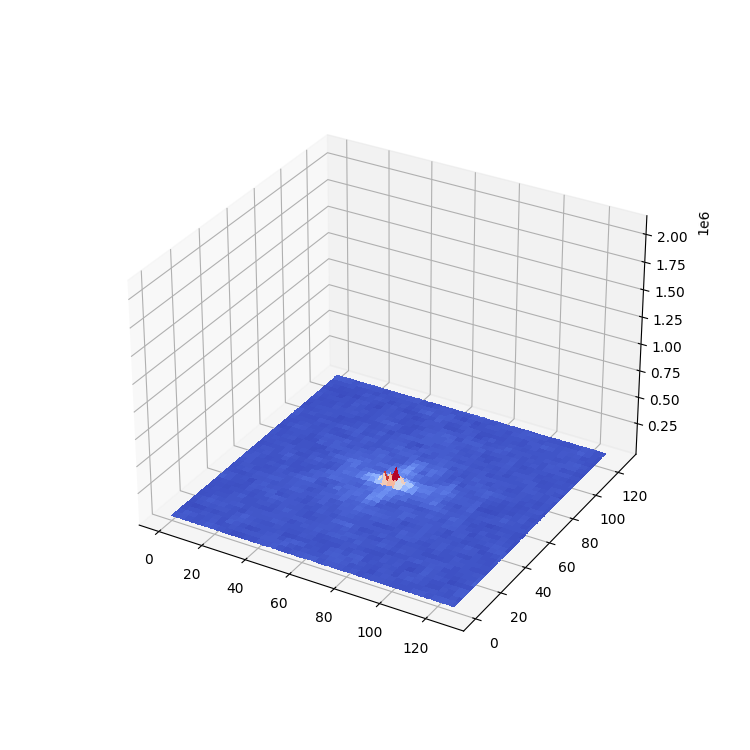

<IPython.core.display.Javascript object>


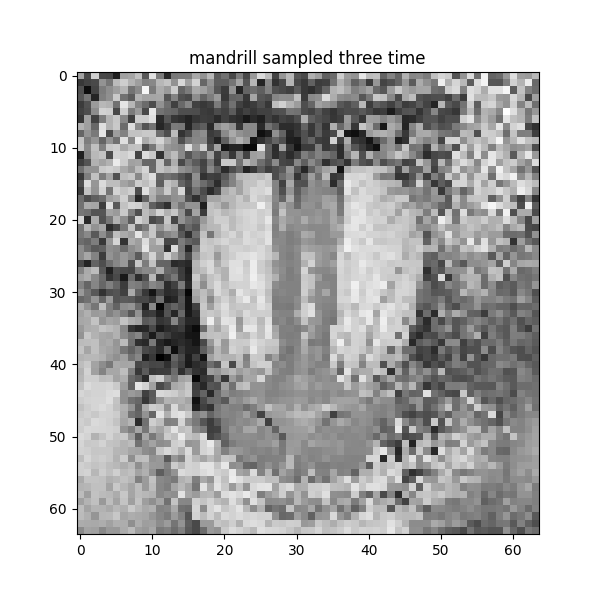

<IPython.core.display.Javascript object>


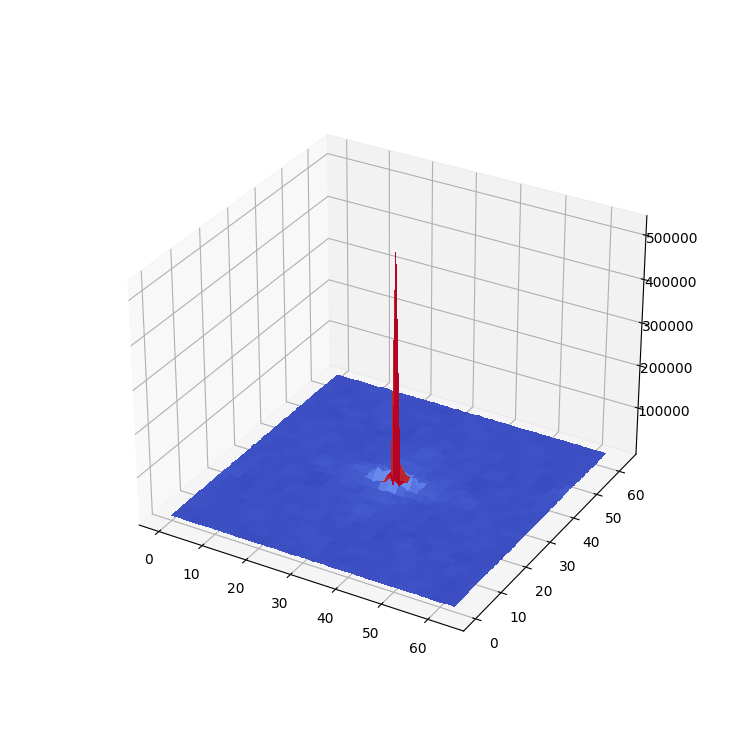

<IPython.core.display.Javascript object>


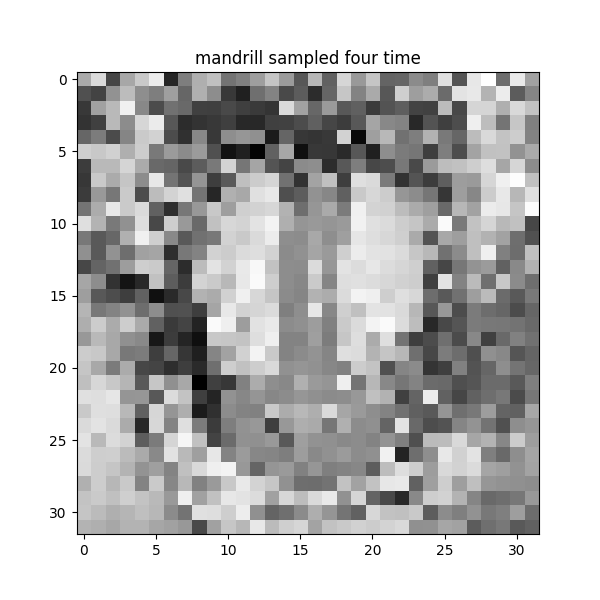

<IPython.core.display.Javascript object>


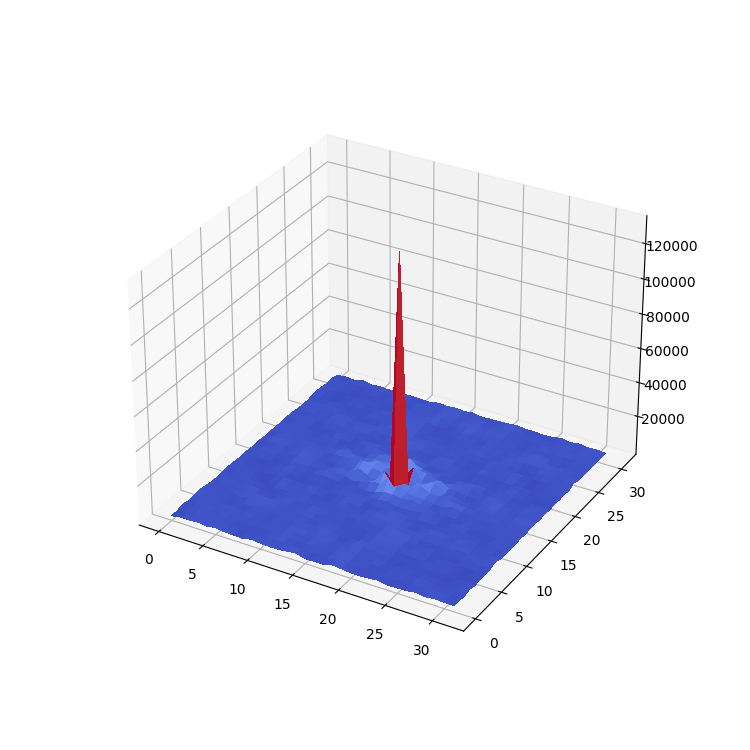

In [16]:
mandrill = np.array(Image.open('img/mandrill.png'))
### your code and comments start below
mandrill_sampled_1 = subSample2(mandrill)
spectrum_1b = np.abs(fftshift(fft2(mandrill_sampled_1)))

mandrill_sampled_2 = subSample2(mandrill_sampled_1)
spectrum_2b = np.abs(fftshift(fft2(mandrill_sampled_2)))

mandrill_sampled_3 = subSample2(mandrill_sampled_2)
spectrum_3b = np.abs(fftshift(fft2(mandrill_sampled_3)))

mandrill_sampled_4 = subSample2(mandrill_sampled_3)
spectrum_4b = np.abs(fftshift(fft2(mandrill_sampled_4)))

imshow(mandrill_sampled_1,title="mandrill sampled one time")
surf(spectrum_1b,title="spectrum of mandrill sampled one time")

imshow(mandrill_sampled_2,title="mandrill sampled two time")
surf(spectrum_2b,title="spectrum of mandrill sampled two time")

imshow(mandrill_sampled_3,title="mandrill sampled three time")
surf(spectrum_3b,title="spectrum of mandrill sampled three time")

imshow(mandrill_sampled_4,title="mandrill sampled four time")
surf(spectrum_4b,title="spectrum of mandrill sampled four time")



On observe le meme phenomène.